In [21]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from deep_dss.utils import *

import numpy as np
import healpy as hp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

In [24]:
def load_cls(sigma8):
    
    !cd /Users/adiraju/CosMomentum/ && bash 00geninfocl.sh $sigma8 > /dev/null 2>&1
    
    new_cls = {"gg": load_cl_from_path("/Users/adiraju/CosMomentum/input/Cl-f1z1f1z1.dat"), 
           "gk": load_cl_from_path("/Users/adiraju/CosMomentum/input/Cl-f1z1f2z1.dat"), 
           "kk": load_cl_from_path("/Users/adiraju/CosMomentum/input/Cl-f2z1f2z1.dat"), 
           "kk_": load_cl_from_path("/Users/adiraju/CosMomentum/input/Cl-f2z2f2z2.dat")}
    
    old_cls = {"gg": load_cl_from_val(sigma8, name="f1z1f1z1", lmax=9999), 
           "gk": load_cl_from_val(sigma8, name="f1z1f2z1", lmax=9999), 
           "kk": load_cl_from_val(sigma8, name="f2z1f2z1", lmax=9999), 
           "kk_": load_cl_from_val(sigma8, name="f2z2f2z2", lmax=9999)}
    
    return old_cls, new_cls

In [25]:
def print_fields_info(sigma8):
    print("Old fields info file: \n")
    
    !cat ../data/flask/input/dss-20-0.28-$sigma8-1.54/dss-20-0.28-$sigma8-1.54-info.dat
    
    print("\n New fields info file: \n")
    
    !cd /Users/adiraju/CosMomentum/ && bash 00geninfocl.sh $sigma8 > /dev/null 2>&1
    !cat /Users/adiraju/CosMomentum/input/info.dat

In [101]:
print_fields_info(0.85)

Old fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.6818505917e-01      1   0.2000   0.4500
    2    1   0.0000   1.7768541733e-02      2   0.2000   0.4500
    2    2   0.0000   1000.               2   0.0000   2.0000

 New fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.69701e-01      1   0.2000   0.4500
    2    1   0.0000   2.64910e-02      2   0.2000   0.4500
    2    2   0.0000   4.10573e-02      2   0.0000   2.0000


In [102]:
print_fields_info(0.5)

Old fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.5671806473e-01      1   0.2000   0.4500
    2    1   0.0000   1.7781312981e-02      2   0.2000   0.4500
    2    2   0.0000   1000.               2   0.0000   2.0000

 New fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.58376e-01      1   0.2000   0.4500
    2    1   0.0000   2.65116e-02      2   0.2000   0.4500
    2    2   0.0000   4.62849e-02      2   0.0000   2.0000


In [103]:
print_fields_info(1.2)

Old fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.8361681788e-01      1   0.2000   0.4500
    2    1   0.0000   1.7853466848e-02      2   0.2000   0.4500
    2    2   0.0000   1000.               2   0.0000   2.0000

 New fields info file: 

# Field number, z bin number, mean, shift, field type, zmin, zmax
# Types: 1-galaxies 2-shear

    1    1   0.0000   6.84949e-01      1   0.2000   0.4500
    2    1   0.0000   2.66130e-02      2   0.2000   0.4500
    2    2   0.0000   3.76192e-02      2   0.0000   2.0000


In [26]:
def plot_all_cls(sigma8):
    
    def plot_cl(ax, old_cl, new_cl, lmax=3000, title=""):
        
        ax.set_title(title)
        ax.set_xlabel("Angular Scale, l")
        ax.set_ylabel("Power, C(l)")
        ax.set_yscale("log")
        ax.plot(old_cl["L"].to_numpy()[:lmax], old_cl["CL"].to_numpy()[:lmax], "b-",
                label="trough_lenser")
        ax.plot(new_cl["L"].to_numpy()[:lmax], new_cl["CL"].to_numpy()[:lmax], "r-",
                label="CosMomentum")
        ax.legend()
    
    old_cls, new_cls = load_cls(sigma8)
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    
    plot_cl(axs[0,0], old_cls["gg"], new_cls["gg"], title="Matter x Matter")
    plot_cl(axs[0,1], old_cls["gk"], new_cls["gk"], title="Matter x Kappa")
    plot_cl(axs[1,0], old_cls["kk"], new_cls["kk"], title="Kappa x Kappa")
    plot_cl(axs[1,1], old_cls["kk_"], new_cls["kk_"], title="Uncorrelated Kappa x Uncorrelated Kappa")
    fig.suptitle(r"Angular Power Spectra for $\sigma_8 = {}$".format(sigma8), fontsize=18)
    fig.show()
    

In [27]:
def plot_all_psds(sigma8):
    
    def plot_psd(ax, old_cl, new_cl, lmax=3000, title=""):
        
        ax.set_title(title)
        ax.set_xlabel("Angular Scale, l")
        ax.set_ylabel("Power Spectral Density, C(l)*l*(l+1)")
#         ax.set_yscale("log")
        ax.plot(old_cl["L"].to_numpy()[:lmax], old_cl["CL"].to_numpy()[:lmax]*old_cl["L"].to_numpy()[:lmax]
                *(old_cl["L"].to_numpy()[:lmax]+1), "b-", label="trough_lenser")
        ax.plot(new_cl["L"].to_numpy()[:lmax], new_cl["CL"].to_numpy()[:lmax]*new_cl["L"].to_numpy()[:lmax]
                *(new_cl["L"].to_numpy()[:lmax]+1), "r-", label="CosMomentum")
        ax.legend()
    
    old_cls, new_cls = load_cls(sigma8)
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    plot_psd(axs[0,0], old_cls["gg"], new_cls["gg"], title="Matter x Matter")
    plot_psd(axs[0,1], old_cls["gk"], new_cls["gk"], title="Matter x Kappa")
    plot_psd(axs[1,0], old_cls["kk"], new_cls["kk"], title="Kappa x Kappa")
    plot_psd(axs[1,1], old_cls["kk_"], new_cls["kk_"], title="Uncorrelated Kappa x Uncorrelated Kappa")
    fig.suptitle(r"Power Spectral Densities for $\sigma_8 = {}$".format(sigma8), fontsize=18)
    fig.show()
    

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


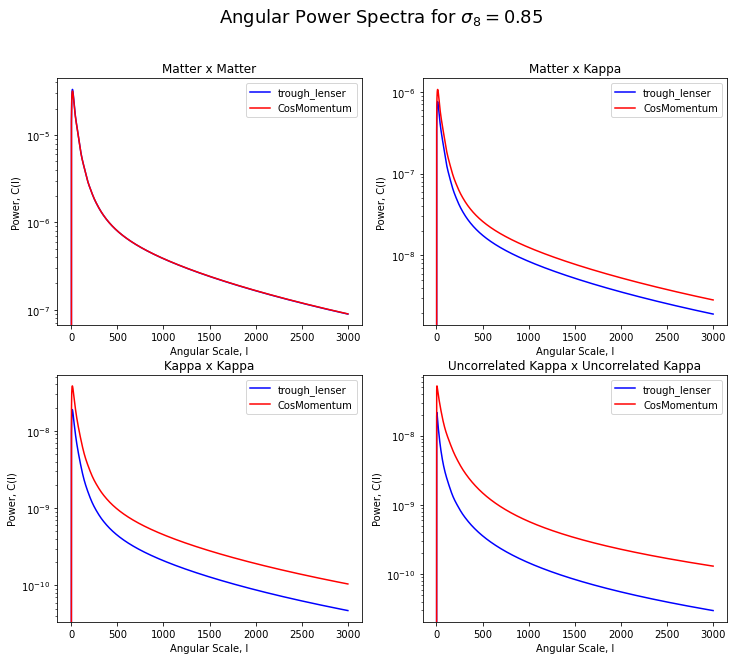

In [141]:
plot_all_cls(0.85)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


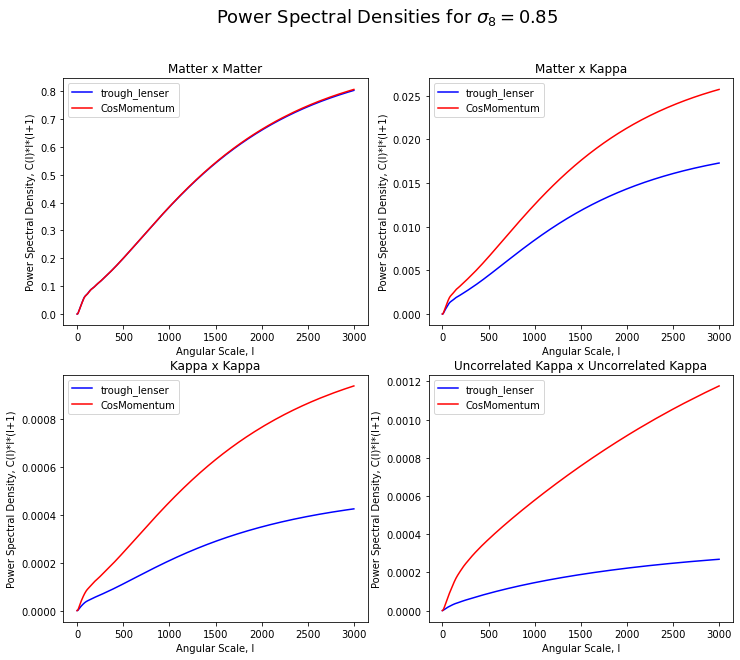

In [142]:
plot_all_psds(0.85)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


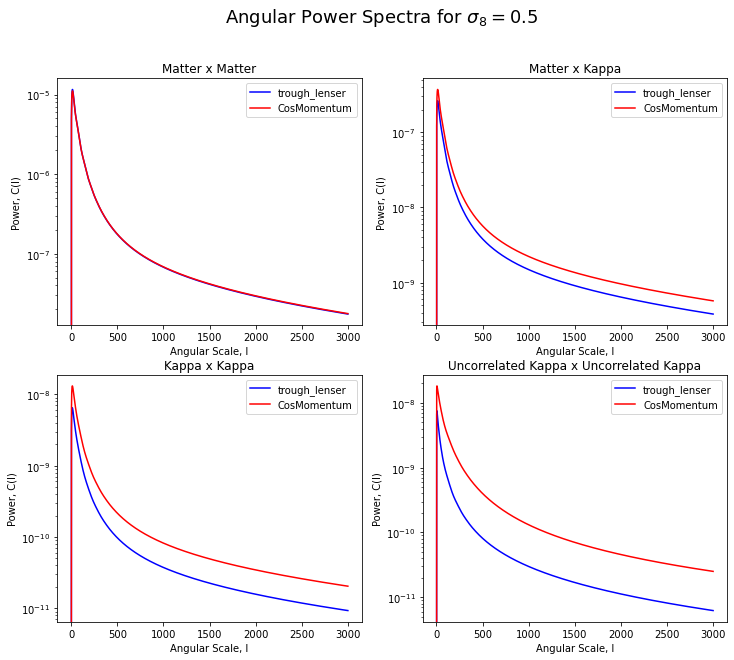

In [143]:
plot_all_cls(0.5)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


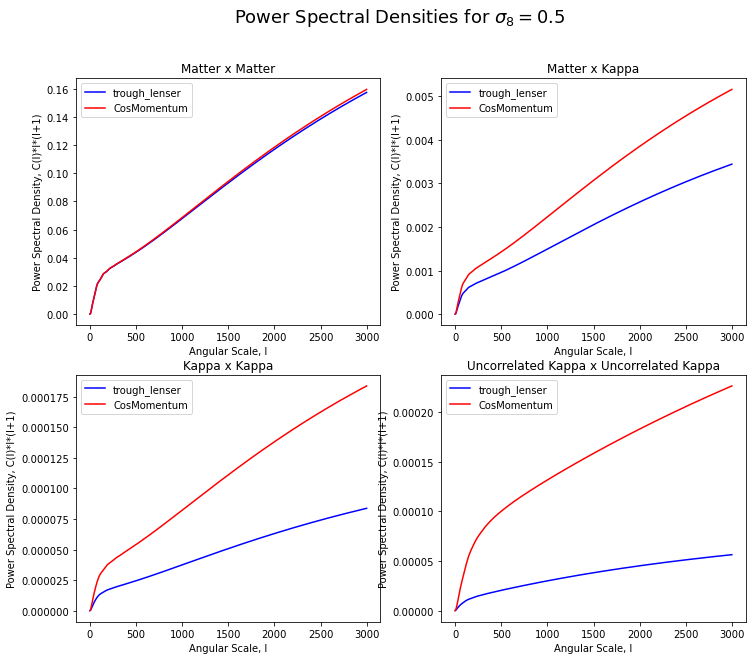

In [144]:
plot_all_psds(0.5)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


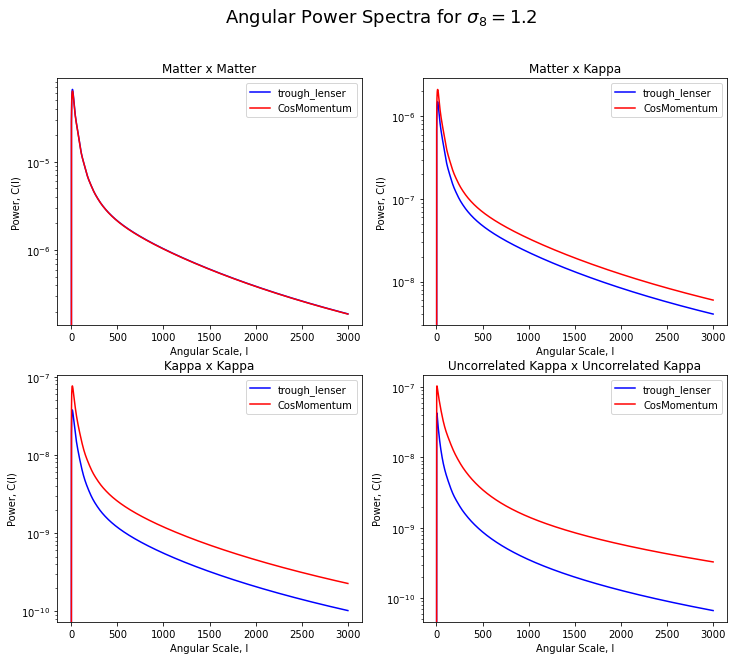

In [145]:
plot_all_cls(1.2)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


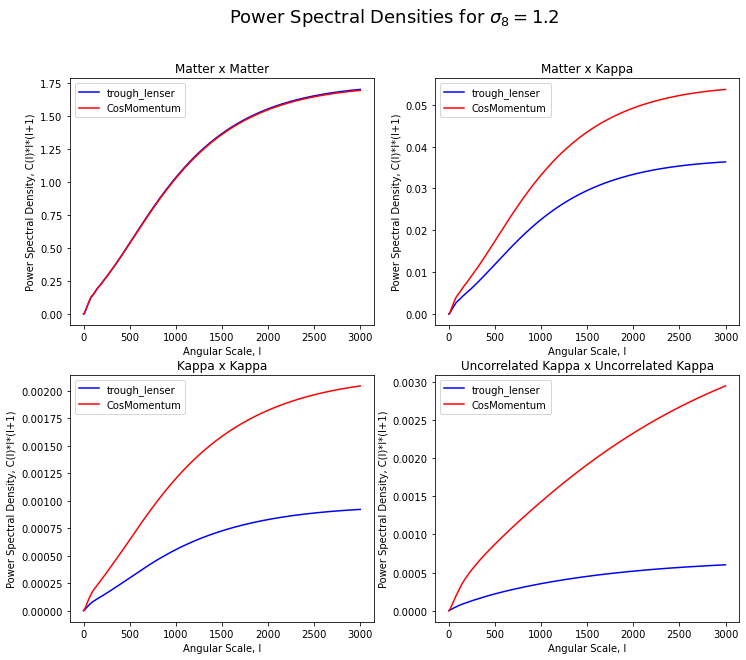

In [146]:
plot_all_psds(1.2)

In [148]:
m = hp.read_map("/Users/adiraju/output/map-f1z1.fits", nest=True)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


In [149]:
m = hp.ud_grade(m, 1024, order_in="NEST", order_out="NEST")

In [150]:
m.shape

(12582912,)

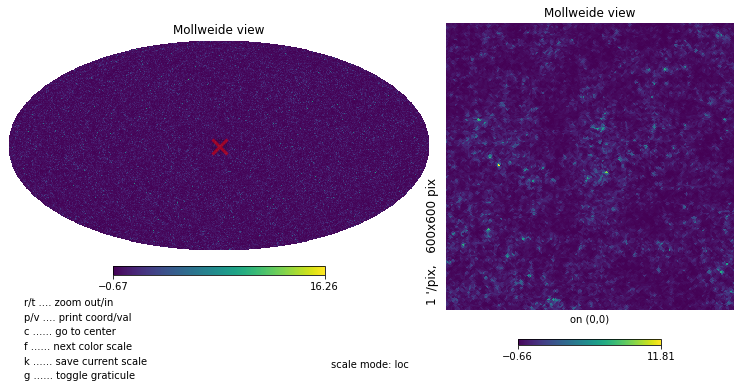

In [156]:
hp.mollzoom(m, nest=True)

In [179]:
kg = hp.read_map("/Users/adiraju/output/kappa-gamma-f2z2.fits", nest=True, field=0)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


In [180]:
kg = hp.ud_grade(kg, 1024, order_in="NEST", order_out="NEST")

In [162]:
n = hp.read_map("/Users/adiraju/deep_dss/data/flask/output/dss-20-0.28-0.85-1.54/map-f1z1.fits.gz", nest=True)

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


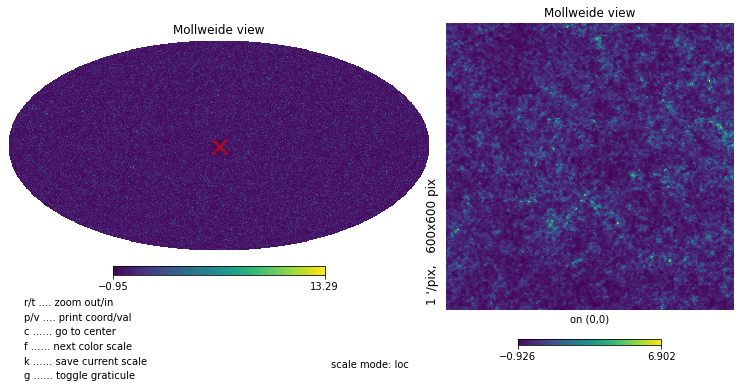

In [163]:
hp.mollzoom(n, nest=True)

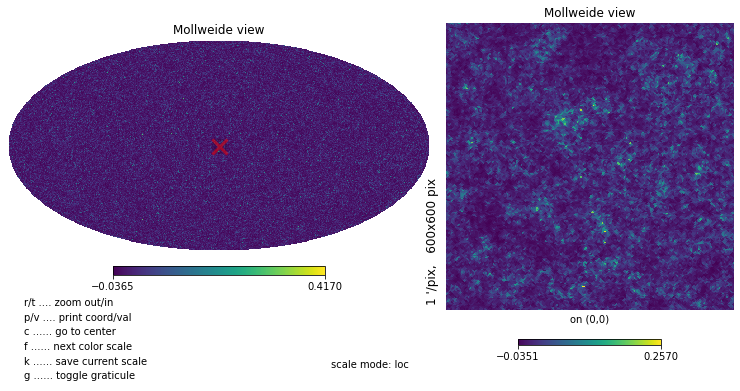

In [182]:
hp.mollzoom(kg, nest=True)

In [181]:
kg2 = hp.read_map("/Users/adiraju/deep_dss/data/flask/output/dss-20-0.28-0.85-1.54/kappa-gamma-f2z1.fits.gz", nest=True, field=0)

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


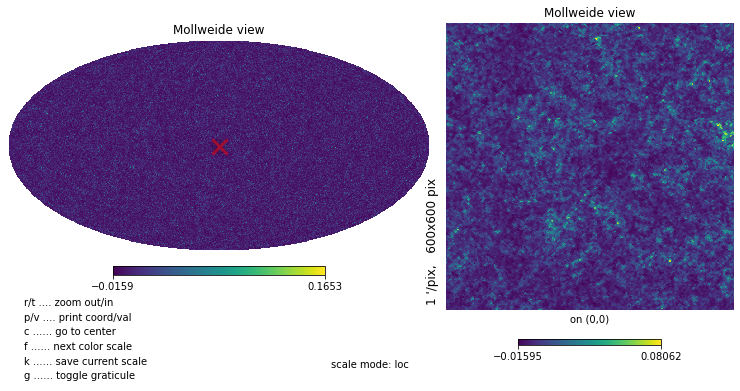

In [183]:
hp.mollzoom(kg2, nest=True)

In [184]:
kg.shape

(12582912,)

In [185]:
kg2.shape

(12582912,)

[-0.05       -0.04999751 -0.04999503 ...  0.49994036  0.49997018
  0.5       ]


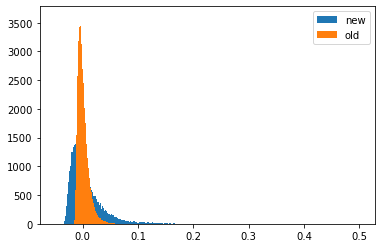

In [195]:
bins = np.geomspace(0.05, 0.6, num=50000) - 0.1
print(bins)

plt.hist(kg, bins, label="new")
plt.hist(kg2, bins, label="old")
plt.legend()

In [4]:
vals = np.linspace(0.5, 1.2, num=201)

In [6]:
for val in vals:
    x = round(val, 5)
    !cd /Users/adiraju/CosMomentum/ && bash cpcosmo.sh $x /Users/adiraju/deep_dss/data/flaskv2/input/dss-$x

bash 00geninfocl.sh 0.5
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/si

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.423s
user	1m2.444s
sys	0m0.365s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5
bash 00geninfocl.sh 0.5035
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5035
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.829s
user	1m3.274s
sys	0m0.265s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5035
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5035
bash 00geninfocl.sh 0.507
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.507
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.396s
user	1m2.555s
sys	0m0.344s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.507
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.507
bash 00geninfocl.sh 0.5105
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5105
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.502s
user	1m1.855s
sys	0m0.267s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5105
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5105
bash 00geninfocl.sh 0.514
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.514
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.539s
user	1m2.073s
sys	0m0.235s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.514
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.514
bash 00geninfocl.sh 0.5175
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5175
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.028s
user	1m1.562s
sys	0m0.232s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5175
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5175
bash 00geninfocl.sh 0.521
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.521
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m8.107s
user	1m7.536s
sys	0m0.289s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.521
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.521
bash 00geninfocl.sh 0.5245
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5245
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m10.738s
user	1m9.746s
sys	0m0.425s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5245
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5245
bash 00geninfocl.sh 0.528
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.528
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.759s
user	1m5.757s
sys	0m0.336s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.528
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.528
bash 00geninfocl.sh 0.5315
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5315
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.507s
user	1m3.409s
sys	0m0.393s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5315
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5315
bash 00geninfocl.sh 0.535
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.535
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.145s
user	1m1.691s
sys	0m0.235s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.535
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.535
bash 00geninfocl.sh 0.5385
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5385
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.906s
user	1m2.373s
sys	0m0.234s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5385
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5385
bash 00geninfocl.sh 0.542
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.542
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.867s
user	1m4.268s
sys	0m0.302s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.542
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.542
bash 00geninfocl.sh 0.5455
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5455
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.433s
user	1m2.812s
sys	0m0.264s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5455
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5455
bash 00geninfocl.sh 0.549
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.549
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.953s
user	1m2.401s
sys	0m0.246s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.549
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.549
bash 00geninfocl.sh 0.5525
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5525
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.824s
user	1m4.285s
sys	0m0.261s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5525
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5525
bash 00geninfocl.sh 0.556
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.556
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.998s
user	1m5.924s
sys	0m0.449s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.556
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.556
bash 00geninfocl.sh 0.5595
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5595
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.330s
user	1m5.122s
sys	0m0.359s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5595
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5595
bash 00geninfocl.sh 0.563
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.563
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.711s
user	1m2.190s
sys	0m0.243s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.563
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.563
bash 00geninfocl.sh 0.5665
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5665
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.151s
user	1m2.432s
sys	0m0.305s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5665
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5665
bash 00geninfocl.sh 0.57
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.57
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.527s
user	1m4.039s
sys	0m0.261s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.57
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.57
bash 00geninfocl.sh 0.5735
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5735
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.700s
user	1m2.713s
sys	0m0.367s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5735
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5735
bash 00geninfocl.sh 0.577
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.577
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.457s
user	1m1.992s
sys	0m0.236s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.577
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.577
bash 00geninfocl.sh 0.5805
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5805
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.258s
user	1m3.798s
sys	0m0.242s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5805
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5805
bash 00geninfocl.sh 0.584
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.584
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.770s
user	1m2.303s
sys	0m0.237s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.584
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.584
bash 00geninfocl.sh 0.5875
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5875
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.336s
user	1m2.870s
sys	0m0.228s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5875
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5875
bash 00geninfocl.sh 0.591
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.591
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.116s
user	1m5.689s
sys	0m0.249s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.591
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.591
bash 00geninfocl.sh 0.5945
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.5945
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.351s
user	1m2.908s
sys	0m0.239s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5945
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.5945
bash 00geninfocl.sh 0.598
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.598
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.881s
user	1m3.352s
sys	0m0.264s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.598
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.598
bash 00geninfocl.sh 0.6015
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6015
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.570s
user	1m4.050s
sys	0m0.282s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6015
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6015
bash 00geninfocl.sh 0.605
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.605
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.050s
user	1m3.119s
sys	0m0.346s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.605
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.605
bash 00geninfocl.sh 0.6085
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6085
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.759s
user	1m2.925s
sys	0m0.233s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6085
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6085
bash 00geninfocl.sh 0.612
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.612
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.641s
user	1m1.857s
sys	0m0.290s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.612
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.612
bash 00geninfocl.sh 0.6155
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6155
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.333s
user	1m2.817s
sys	0m0.248s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6155
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6155
bash 00geninfocl.sh 0.619
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.619
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.475s
user	1m3.028s
sys	0m0.232s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.619
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.619
bash 00geninfocl.sh 0.6225
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6225
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.584s
user	1m3.128s
sys	0m0.231s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6225
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6225
bash 00geninfocl.sh 0.626
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.626
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.394s
user	1m2.875s
sys	0m0.274s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.626
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.626
bash 00geninfocl.sh 0.6295
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6295
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.346s
user	1m1.792s
sys	0m0.245s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6295
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6295
bash 00geninfocl.sh 0.633
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.633
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.679s
user	1m2.207s
sys	0m0.228s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.633
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.633
bash 00geninfocl.sh 0.6365
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6365
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.229s
user	1m2.601s
sys	0m0.227s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6365
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6365
bash 00geninfocl.sh 0.64
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.64
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

290   1.47993   0.0136125
291   1.48228   0.0131745
292   1.48465   0.0127414
293   1.48702   0.0123155
294   1.48937   0.0118987
295   1.49169   0.0114893
296   1.49403   0.0110849
297   1.49636   0.0106878
298   1.49868   0.0102997
299   1.50097   0.0099189
300   1.50327   0.00954333
301   1.50557   0.00917499
302   1.50785   0.0088156
303   1.51011   0.00846352
304   1.51238   0.00811682
305   1.51464   0.00777737
306   1.5169   0.00744673
307   1.51912   0.00712342
308   1.52136   0.00680564
309   1.52359   0.00649513
310   1.52581   0.00619329
311   1.528   0.00589878
312   1.53021   0.00560996
313   1.53241   0.00532841
314   1.5346   0.0050554
315   1.53676   0.00478972
316   1.53894   0.00452988
317   1.54111   0.00427731
318   1.54327   0.00403314
319   1.5454   0.0037963
320   1.54755   0.00356545
321   1.54969   0.00334186
322   1.55182   0.00312653
323   1.55392   0.00291853
324   1.55604   0.00271666
325   1.55815   0.00252205
326   1.56025   0.00233555
327   1.56233   0.0

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.361s
user	1m2.833s
sys	0m0.234s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6435
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6435
bash 00geninfocl.sh 0.647
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.647
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.254s
user	1m2.553s
sys	0m0.287s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.647
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.647
bash 00geninfocl.sh 0.6505
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6505
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.817s
user	1m2.204s
sys	0m0.267s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6505
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6505
bash 00geninfocl.sh 0.654
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.654
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.808s
user	1m2.337s
sys	0m0.234s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.654
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.654
bash 00geninfocl.sh 0.6575
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6575
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.314s
user	1m2.831s
sys	0m0.241s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6575
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6575
bash 00geninfocl.sh 0.661
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.661
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.027s
user	1m2.557s
sys	0m0.264s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.661
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.661
bash 00geninfocl.sh 0.6645
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6645
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.941s
user	1m3.229s
sys	0m0.293s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6645
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6645
bash 00geninfocl.sh 0.668
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.668
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.457s
user	1m2.897s
sys	0m0.290s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.668
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.668
bash 00geninfocl.sh 0.6715
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6715
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.582s
user	1m3.044s
sys	0m0.270s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6715
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6715
bash 00geninfocl.sh 0.675
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.675
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.915s
user	1m2.453s
sys	0m0.233s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.675
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.675
bash 00geninfocl.sh 0.6785
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6785
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.612s
user	1m5.153s
sys	0m0.249s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6785
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6785
bash 00geninfocl.sh 0.682
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.682
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.356s
user	1m3.365s
sys	0m0.337s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.682
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.682
bash 00geninfocl.sh 0.6855
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6855
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.270s
user	1m2.636s
sys	0m0.294s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6855
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6855
bash 00geninfocl.sh 0.689
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.689
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.327s
user	1m2.903s
sys	0m0.227s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.689
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.689
bash 00geninfocl.sh 0.6925
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6925
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.180s
user	1m2.735s
sys	0m0.231s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6925
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6925
bash 00geninfocl.sh 0.696
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.696
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.753s
user	1m2.320s
sys	0m0.225s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.696
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.696
bash 00geninfocl.sh 0.6995
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.6995
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.697s
user	1m2.266s
sys	0m0.238s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6995
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.6995
bash 00geninfocl.sh 0.703
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.703
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.675s
user	1m2.251s
sys	0m0.224s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.703
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.703
bash 00geninfocl.sh 0.7065
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7065
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.322s
user	1m2.826s
sys	0m0.231s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7065
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7065
bash 00geninfocl.sh 0.71
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.71
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.846s
user	1m2.272s
sys	0m0.259s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.71
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.71
bash 00geninfocl.sh 0.7135
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7135
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.950s
user	1m2.260s
sys	0m0.256s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7135
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7135
bash 00geninfocl.sh 0.717
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.717
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.125s
user	1m2.523s
sys	0m0.239s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.717
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.717
bash 00geninfocl.sh 0.7205
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7205
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.207s
user	1m1.761s
sys	0m0.234s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7205
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7205
bash 00geninfocl.sh 0.724
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.724
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.916s
user	1m2.514s
sys	0m0.232s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.724
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.724
bash 00geninfocl.sh 0.7275
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7275
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.782s
user	1m2.912s
sys	0m0.309s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7275
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7275
bash 00geninfocl.sh 0.731
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.731
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.291s
user	1m2.734s
sys	0m0.239s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.731
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.731
bash 00geninfocl.sh 0.7345
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7345
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.303s
user	1m2.697s
sys	0m0.295s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7345
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7345
bash 00geninfocl.sh 0.738
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.738
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.674s
user	1m3.065s
sys	0m0.273s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.738
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.738
bash 00geninfocl.sh 0.7415
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7415
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.574s
user	1m2.998s
sys	0m0.288s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7415
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7415
bash 00geninfocl.sh 0.745
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.745
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.852s
user	1m3.238s
sys	0m0.275s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.745
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.745
bash 00geninfocl.sh 0.7485
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7485
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.912s
user	1m2.225s
sys	0m0.289s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7485
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7485
bash 00geninfocl.sh 0.752
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.752
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.756s
user	1m3.124s
sys	0m0.271s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.752
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.752
bash 00geninfocl.sh 0.7555
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7555
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.930s
user	1m2.870s
sys	0m0.376s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7555
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7555
bash 00geninfocl.sh 0.759
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.759
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.071s
user	1m3.211s
sys	0m0.313s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.759
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.759
bash 00geninfocl.sh 0.7625
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7625
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.294s
user	1m3.079s
sys	0m0.370s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7625
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7625
bash 00geninfocl.sh 0.766
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.766
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.901s
user	1m2.366s
sys	0m0.244s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.766
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.766
bash 00geninfocl.sh 0.7695
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7695
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.632s
user	1m2.889s
sys	0m0.313s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7695
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7695
bash 00geninfocl.sh 0.773
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.773
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.547s
user	1m2.040s
sys	0m0.247s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.773
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.773
bash 00geninfocl.sh 0.7765
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7765
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.399s
user	1m2.582s
sys	0m0.275s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7765
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7765
bash 00geninfocl.sh 0.78
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.78
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.750s
user	1m2.894s
sys	0m0.298s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.78
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.78
bash 00geninfocl.sh 0.7835
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7835
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.745s
user	1m2.224s
sys	0m0.275s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7835
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7835
bash 00geninfocl.sh 0.787
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.787
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.657s
user	1m2.022s
sys	0m0.263s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.787
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.787
bash 00geninfocl.sh 0.7905
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7905
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.083s
user	1m2.315s
sys	0m0.319s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7905
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7905
bash 00geninfocl.sh 0.794
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.794
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.818s
user	1m2.364s
sys	0m0.242s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.794
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.794
bash 00geninfocl.sh 0.7975
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.7975
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.296s
user	1m2.519s
sys	0m0.276s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7975
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.7975
bash 00geninfocl.sh 0.801
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.801
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.117s
user	1m3.535s
sys	0m0.239s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.801
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.801
bash 00geninfocl.sh 0.8045
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8045
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.799s
user	1m3.604s
sys	0m0.368s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8045
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8045
bash 00geninfocl.sh 0.808
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.808
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.174s
user	1m2.696s
sys	0m0.224s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.808
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.808
bash 00geninfocl.sh 0.8115
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8115
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.300s
user	1m1.860s
sys	0m0.238s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8115
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8115
bash 00geninfocl.sh 0.815
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.815
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.034s
user	1m2.595s
sys	0m0.225s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.815
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.815
bash 00geninfocl.sh 0.8185
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8185
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

232   1.32528   0.0508917
233   1.32827   0.0500608
234   1.33125   0.04924
235   1.33419   0.0484254
236   1.33714   0.0476128
237   1.34009   0.0468062
238   1.34302   0.0460098
239   1.3459   0.0452197
240   1.34881   0.0444317
241   1.3517   0.0436501
242   1.35458   0.0428786
243   1.35743   0.0421135
244   1.36028   0.0413508
245   1.36313   0.0405946
246   1.36596   0.0398484
247   1.36876   0.0391088
248   1.37157   0.0383719
249   1.37437   0.0376415
250   1.37716   0.0369212
251   1.37991   0.0362076
252   1.38267   0.0354969
253   1.38543   0.0347928
254   1.38817   0.0340987
255   1.39088   0.0334114
256   1.3936   0.0327272
257   1.39631   0.0320498
258   1.39901   0.0313824
259   1.40168   0.0307218
260   1.40436   0.0300645
261   1.40702   0.0294141
262   1.40968   0.0287736
263   1.4123   0.02814
264   1.41494   0.02751
265   1.41757   0.0268869
266   1.42019   0.0262736
267   1.42277   0.0256673
268   1.42536   0.0250649
269   1.42795   0.0244693
270   1.43053   0.0238

175   1.13133   0.106334
176   1.13521   0.105259
177   1.13906   0.104185
178   1.1429   0.103119
179   1.14668   0.102055
180   1.15047   0.100987
181   1.15426   0.099922
182   1.15802   0.0988645
183   1.16173   0.0978097
184   1.16545   0.0967522
185   1.16916   0.0956974
186   1.17285   0.0946506
187   1.17649   0.093607
188   1.18015   0.092561
189   1.18379   0.0915182
190   1.18741   0.0904838
191   1.19098   0.0894528
192   1.19457   0.0884201
193   1.19814   0.0873908
194   1.2017   0.0863703
195   1.2052   0.0853535
196   1.20873   0.0843354
197   1.21223   0.0833212
198   1.21572   0.0823159
199   1.21916   0.0813147
200   1.22262   0.0803126
201   1.22606   0.0793146
202   1.22949   0.0783259
203   1.23287   0.0773416
204   1.23627   0.0763567
205   1.23965   0.0753763
206   1.24301   0.0744052
207   1.24633   0.0734389
208   1.24966   0.0724724
209   1.25299   0.0715107
210   1.25629   0.0705584
211   1.25955   0.0696112
212   1.26283   0.0686641
213   1.26609   0.067722

97   0.759056   0.180071
98   0.764907   0.179527
99   0.770719   0.178963
100   0.776504   0.178378
101   0.782262   0.177773
102   0.787992   0.177152
103   0.793633   0.176514
104   0.799299   0.175854
105   0.804933   0.175177
106   0.810535   0.174487
107   0.81605   0.17378
108   0.821589   0.173055
109   0.827097   0.172313
110   0.832574   0.17156
111   0.837966   0.170794
112   0.843382   0.170008
113   0.848768   0.16921
114   0.854123   0.168402
115   0.859396   0.167581
116   0.864693   0.166744
117   0.86996   0.165894
118   0.875198   0.165037
119   0.880355   0.164169
120   0.885535   0.163285
121   0.890687   0.162391
122   0.89581   0.161491
123   0.900855   0.160582
124   0.905923   0.159658
125   0.910963   0.158725
126   0.915975   0.157787
127   0.920911   0.156842
128   0.925869   0.155883
129   0.930801   0.154916
130   0.935706   0.153946
131   0.940536   0.152969
132   0.945388   0.151981
133   0.950214   0.150985
134   0.955015   0.149988
135   0.959742   0.14

NOTE: in FlatHomogeneousUniverseLCDM::set_initial_conditions(): initial conditions module assumes flat universe!
WARNING in FlatInhomogeneousUniverseLCDM::set_initial_conditions(): growth factor is computed for matter density fluctuations and all other components are assumed to be homogeneous!
Setting sphere variances.
Setting cylinder variances.
Setting spherical collapse evolution.
Setting cylindrical collapse evolution.
Done.
0   0   0.000611091
1   0.00499463   0.00176394
2   0.0099785   0.00284177
3   0.0149516   0.00385532
4   0.0199138   0.00481133
5   0.0248652   0.00571469
6   0.0298056   0.00656922
7   0.0347351   0.00737805
8   0.0396537   0.00814383
9   0.0445612   0.00886885
10   0.0494577   0.00955511
11   0.0543431   0.0102044
12   0.0592175   0.0108184
13   0.0640807   0.0113984
14   0.0689327   0.011946
15   0.0737736   0.0124623
16   0.0786033   0.0129485
17   0.0834217   0.0134056
18   0.0882289   0.0138348
19   0.0930248   0.0142368
20   0.0978093   0.0146128
21   0

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.134s
user	1m2.702s
sys	0m0.230s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.829
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.829
bash 00geninfocl.sh 0.8325
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8325
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.743s
user	1m2.145s
sys	0m0.252s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8325
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8325
bash 00geninfocl.sh 0.836
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.836
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m2.796s
user	1m2.312s
sys	0m0.226s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.836
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.836
bash 00geninfocl.sh 0.8395
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8395
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.274s
user	1m2.818s
sys	0m0.236s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8395
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8395
bash 00geninfocl.sh 0.843
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.843
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.063s
user	1m2.643s
sys	0m0.230s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.843
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.843
bash 00geninfocl.sh 0.8465
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8465
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

291   1.48228   0.0131745
292   1.48465   0.0127414
293   1.48702   0.0123155
294   1.48937   0.0118987
295   1.49169   0.0114893
296   1.49403   0.0110849
297   1.49636   0.0106878
298   1.49868   0.0102997
299   1.50097   0.0099189
300   1.50327   0.00954333
301   1.50557   0.00917499
302   1.50785   0.0088156
303   1.51011   0.00846352
304   1.51238   0.00811682
305   1.51464   0.00777737
306   1.5169   0.00744673
307   1.51912   0.00712342
308   1.52136   0.00680564
309   1.52359   0.00649513
310   1.52581   0.00619329
311   1.528   0.00589878
312   1.53021   0.00560996
313   1.53241   0.00532841
314   1.5346   0.0050554
315   1.53676   0.00478972
316   1.53894   0.00452988
317   1.54111   0.00427731
318   1.54327   0.00403314
319   1.5454   0.0037963
320   1.54755   0.00356545
321   1.54969   0.00334186
322   1.55182   0.00312653
323   1.55392   0.00291853
324   1.55604   0.00271666
325   1.55815   0.00252205
326   1.56025   0.00233555
327   1.56233   0.00215637
328   1.56442   0.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.738s
user	1m3.125s
sys	0m0.261s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.85
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.85
bash 00geninfocl.sh 0.8535
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8535
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

computing C_ells:
Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.495s
user	1m2.749s
sys	0m0.267s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8535
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8535
bash 00geninfocl.sh 0.857
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.857
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and w

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.354s
user	1m2.724s
sys	0m0.235s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.857
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.857
bash 00geninfocl.sh 0.8605
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8605
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.682s
user	1m2.890s
sys	0m0.276s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8605
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8605
bash 00geninfocl.sh 0.864
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.864
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m8.339s
user	1m7.424s
sys	0m0.434s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.864
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.864
bash 00geninfocl.sh 0.8675
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8675
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m13.059s
user	1m11.827s
sys	0m0.468s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8675
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8675
bash 00geninfocl.sh 0.871
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.871
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed i

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m11.118s
user	1m10.110s
sys	0m0.424s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.871
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.871
bash 00geninfocl.sh 0.8745
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8745
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed i

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.962s
user	1m5.638s
sys	0m0.465s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8745
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8745
bash 00geninfocl.sh 0.878
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.878
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.846s
user	1m4.203s
sys	0m0.255s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.878
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.878
bash 00geninfocl.sh 0.8815
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8815
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.533s
user	1m4.420s
sys	0m0.362s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8815
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8815
bash 00geninfocl.sh 0.885
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.885
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.118s
user	1m4.470s
sys	0m0.270s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.885
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.885
bash 00geninfocl.sh 0.8885
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8885
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.029s
user	1m3.835s
sys	0m0.365s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8885
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8885
bash 00geninfocl.sh 0.892
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.892
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.396s
user	1m3.637s
sys	0m0.286s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.892
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.892
bash 00geninfocl.sh 0.8955
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.8955
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.233s
user	1m3.213s
sys	0m0.378s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8955
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.8955
bash 00geninfocl.sh 0.899
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.899
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.626s
user	1m4.106s
sys	0m0.254s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.899
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.899
bash 00geninfocl.sh 0.9025
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9025
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

332   1.57268   0.00136578
333   1.57473   0.00122906
334   1.57678   0.00110015
335   1.5788   0.000978538
336   1.58083   0.000863472
337   1.58286   0.000755641
338   1.58487   0.000655464
339   1.58687   0.000562575
340   1.58887   0.000476363
341   1.59087   0.000397375
342   1.59286   0.000325883
343   1.59483   0.000261664
344   1.59681   0.000204253
345   1.59878   0.00015405
346   1.60075   0.000111185
347   1.60269   7.55756e-05
348   1.60464   4.69017e-05
349   1.60659   2.54196e-05
350   1.60853   1.11154e-05
351   1.61045   4.048e-06
5.713298217001691
computing C_ells:
Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.923s
user	1m3.688s
sys	0m0.389s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9025
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9025
bash 00geninfocl.sh 0.906
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.906
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/pyth

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.241s
user	1m3.599s
sys	0m0.250s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.906
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.906
bash 00geninfocl.sh 0.9095
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9095
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.513s
user	1m3.066s
sys	0m0.242s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9095
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9095
bash 00geninfocl.sh 0.913
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.913
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.936s
user	1m3.394s
sys	0m0.252s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.913
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.913
bash 00geninfocl.sh 0.9165
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9165
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.161s
user	1m4.396s
sys	0m0.270s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9165
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9165
bash 00geninfocl.sh 0.92
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.92
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.418s
user	1m2.773s
sys	0m0.250s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.92
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.92
bash 00geninfocl.sh 0.9235
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9235
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.174s
user	1m3.482s
sys	0m0.302s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9235
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9235
bash 00geninfocl.sh 0.927
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.927
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.891s
user	1m3.314s
sys	0m0.262s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.927
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.927
bash 00geninfocl.sh 0.9305
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9305
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.361s
user	1m2.833s
sys	0m0.279s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9305
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9305
bash 00geninfocl.sh 0.934
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.934
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.426s
user	1m3.871s
sys	0m0.278s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.934
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.934
bash 00geninfocl.sh 0.9375
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9375
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.608s
user	1m3.787s
sys	0m0.256s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9375
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9375
bash 00geninfocl.sh 0.941
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.941
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.271s
user	1m3.402s
sys	0m0.324s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.941
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.941
bash 00geninfocl.sh 0.9445
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9445
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.143s
user	1m3.633s
sys	0m0.258s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9445
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9445
bash 00geninfocl.sh 0.948
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.948
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.833s
user	1m4.203s
sys	0m0.285s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.948
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.948
bash 00geninfocl.sh 0.9515
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9515
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.658s
user	1m3.815s
sys	0m0.298s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9515
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9515
bash 00geninfocl.sh 0.955
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.955
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.629s
user	1m3.914s
sys	0m0.275s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.955
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.955
bash 00geninfocl.sh 0.9585
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9585
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.369s
user	1m3.655s
sys	0m0.323s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9585
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9585
bash 00geninfocl.sh 0.962
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.962
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.154s
user	1m3.625s
sys	0m0.264s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.962
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.962
bash 00geninfocl.sh 0.9655
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9655
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.803s
user	1m4.447s
sys	0m0.409s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9655
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9655
bash 00geninfocl.sh 0.969
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.969
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.437s
user	1m3.647s
sys	0m0.296s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.969
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.969
bash 00geninfocl.sh 0.9725
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9725
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.004s
user	1m3.474s
sys	0m0.261s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9725
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9725
bash 00geninfocl.sh 0.976
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.976
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.001s
user	1m3.422s
sys	0m0.293s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.976
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.976
bash 00geninfocl.sh 0.9795
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9795
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.196s
user	1m3.584s
sys	0m0.286s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9795
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9795
bash 00geninfocl.sh 0.983
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.983
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.715s
user	1m3.966s
sys	0m0.328s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.983
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.983
bash 00geninfocl.sh 0.9865
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9865
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.016s
user	1m4.439s
sys	0m0.294s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9865
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9865
bash 00geninfocl.sh 0.99
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.99
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.783s
user	1m3.710s
sys	0m0.377s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.99
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.99
bash 00geninfocl.sh 0.9935
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.9935
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.796s
user	1m4.140s
sys	0m0.298s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9935
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.9935
bash 00geninfocl.sh 0.997
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 0.997
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.380s
user	1m3.756s
sys	0m0.320s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.997
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-0.997
bash 00geninfocl.sh 1.0005
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0005
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.772s
user	1m3.254s
sys	0m0.266s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0005
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0005
bash 00geninfocl.sh 1.004
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.004
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.182s
user	1m3.610s
sys	0m0.300s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.004
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.004
bash 00geninfocl.sh 1.0075
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0075
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.258s
user	1m3.652s
sys	0m0.284s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0075
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0075
bash 00geninfocl.sh 1.011
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.011
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.965s
user	1m3.363s
sys	0m0.311s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.011
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.011
bash 00geninfocl.sh 1.0145
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0145
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.497s
user	1m3.711s
sys	0m0.276s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0145
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0145
bash 00geninfocl.sh 1.018
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.018
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.893s
user	1m4.239s
sys	0m0.286s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.018
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.018
bash 00geninfocl.sh 1.0215
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0215
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m8.693s
user	1m7.902s
sys	0m0.320s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0215
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0215
bash 00geninfocl.sh 1.025
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.025
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m9.797s
user	1m8.619s
sys	0m0.436s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.025
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.025
bash 00geninfocl.sh 1.0285
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0285
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m11.415s
user	1m10.120s
sys	0m0.449s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0285
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0285
bash 00geninfocl.sh 1.032
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.032
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed i

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m13.752s
user	1m12.259s
sys	0m0.478s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.032
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.032
bash 00geninfocl.sh 1.0355
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0355
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed i

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m11.007s
user	1m9.799s
sys	0m0.437s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0355
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0355
bash 00geninfocl.sh 1.039
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.039
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m10.308s
user	1m9.434s
sys	0m0.369s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.039
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.039
bash 00geninfocl.sh 1.0425
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0425
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m11.481s
user	1m10.196s
sys	0m0.471s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0425
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0425
bash 00geninfocl.sh 1.046
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.046
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed i

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.508s
user	1m5.434s
sys	0m0.392s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.046
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.046
bash 00geninfocl.sh 1.0495
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0495
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m12.294s
user	1m11.196s
sys	0m0.489s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0495
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0495
bash 00geninfocl.sh 1.053
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.053
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed i

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.117s
user	1m5.561s
sys	0m0.285s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.053
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.053
bash 00geninfocl.sh 1.0565
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0565
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.446s
user	1m4.917s
sys	0m0.283s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0565
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0565
bash 00geninfocl.sh 1.06
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.06
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.596s
user	1m4.004s
sys	0m0.294s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.06
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.06
bash 00geninfocl.sh 1.0635
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0635
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.226s
user	1m3.692s
sys	0m0.247s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0635
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0635
bash 00geninfocl.sh 1.067
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.067
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m10.415s
user	1m9.770s
sys	0m0.330s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.067
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.067
bash 00geninfocl.sh 1.0705
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0705
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.970s
user	1m5.371s
sys	0m0.269s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0705
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0705
bash 00geninfocl.sh 1.074
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.074
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.290s
user	1m4.667s
sys	0m0.301s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.074
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.074
bash 00geninfocl.sh 1.0775
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0775
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.152s
user	1m3.621s
sys	0m0.297s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0775
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0775
bash 00geninfocl.sh 1.081
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.081
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.873s
user	1m4.297s
sys	0m0.299s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.081
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.081
bash 00geninfocl.sh 1.0845
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0845
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.252s
user	1m3.590s
sys	0m0.296s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0845
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0845
bash 00geninfocl.sh 1.088
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.088
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.522s
user	1m3.874s
sys	0m0.293s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.088
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.088
bash 00geninfocl.sh 1.0915
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0915
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.086s
user	1m4.224s
sys	0m0.300s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0915
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0915
bash 00geninfocl.sh 1.095
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.095
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.223s
user	1m4.461s
sys	0m0.295s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.095
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.095
bash 00geninfocl.sh 1.0985
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.0985
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.020s
user	1m4.826s
sys	0m0.370s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0985
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.0985
bash 00geninfocl.sh 1.102
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.102
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.478s
user	1m4.531s
sys	0m0.321s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.102
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.102
bash 00geninfocl.sh 1.1055
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1055
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.901s
user	1m4.236s
sys	0m0.312s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1055
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1055
bash 00geninfocl.sh 1.109
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.109
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.880s
user	1m3.910s
sys	0m0.353s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.109
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.109
bash 00geninfocl.sh 1.1125
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1125
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.130s
user	1m4.435s
sys	0m0.259s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1125
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1125
bash 00geninfocl.sh 1.116
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.116
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.923s
user	1m3.765s
sys	0m0.401s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.116
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.116
bash 00geninfocl.sh 1.1195
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1195
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.180s
user	1m3.563s
sys	0m0.261s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1195
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1195
bash 00geninfocl.sh 1.123
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.123
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.591s
user	1m4.017s
sys	0m0.251s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.123
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.123
bash 00geninfocl.sh 1.1265
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1265
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.870s
user	1m4.242s
sys	0m0.274s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1265
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1265
bash 00geninfocl.sh 1.13
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.13
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.592s
user	1m3.041s
sys	0m0.273s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.13
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.13
bash 00geninfocl.sh 1.1335
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1335
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.750s
user	1m4.191s
sys	0m0.278s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1335
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1335
bash 00geninfocl.sh 1.137
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.137
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.939s
user	1m5.123s
sys	0m0.339s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.137
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.137
bash 00geninfocl.sh 1.1405
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1405
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.775s
user	1m4.254s
sys	0m0.249s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1405
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1405
bash 00geninfocl.sh 1.144
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.144
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.592s
user	1m3.571s
sys	0m0.388s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.144
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.144
bash 00geninfocl.sh 1.1475
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1475
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.751s
user	1m3.215s
sys	0m0.242s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1475
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1475
bash 00geninfocl.sh 1.151
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.151
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m5.065s
user	1m4.566s
sys	0m0.245s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.151
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.151
bash 00geninfocl.sh 1.1545
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1545
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.334s
user	1m3.837s
sys	0m0.255s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1545
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1545
bash 00geninfocl.sh 1.158
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.158
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.495s
user	1m3.986s
sys	0m0.244s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.158
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.158
bash 00geninfocl.sh 1.1615
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1615
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.337s
user	1m3.805s
sys	0m0.252s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1615
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1615
bash 00geninfocl.sh 1.165
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.165
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

251   1.37991   0.0362076
252   1.38267   0.0354969
253   1.38543   0.0347928
254   1.38817   0.0340987
255   1.39088   0.0334114
256   1.3936   0.0327272
257   1.39631   0.0320498
258   1.39901   0.0313824
259   1.40168   0.0307218
260   1.40436   0.0300645
261   1.40702   0.0294141
262   1.40968   0.0287736
263   1.4123   0.02814
264   1.41494   0.02751
265   1.41757   0.0268869
266   1.42019   0.0262736
267   1.42277   0.0256673
268   1.42536   0.0250649
269   1.42795   0.0244693
270   1.43053   0.0238835
271   1.43307   0.0233048
272   1.43562   0.0227301
273   1.43817   0.0221624
274   1.44071   0.0216044
275   1.44321   0.0210535
276   1.44573   0.0205067
277   1.44824   0.019967
278   1.45074   0.019437
279   1.4532   0.0189141
280   1.45568   0.0183955
281   1.45815   0.017884
282   1.46061   0.0173821
283   1.46304   0.0168873
284   1.46548   0.0163971
285   1.46792   0.015914
286   1.47034   0.0154404
287   1.47273   0.014974
288   1.47514   0.0145122
289   1.47754   0.014057

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m4.366s
user	1m3.695s
sys	0m0.250s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1685
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1685
bash 00geninfocl.sh 1.172
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.172
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.849s
user	1m3.297s
sys	0m0.233s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.172
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.172
bash 00geninfocl.sh 1.1755
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1755
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.652s
user	1m3.070s
sys	0m0.267s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1755
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1755
bash 00geninfocl.sh 1.179
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.179
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.731s
user	1m3.142s
sys	0m0.259s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.179
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.179
bash 00geninfocl.sh 1.1825
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1825
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.822s
user	1m3.103s
sys	0m0.253s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1825
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1825
bash 00geninfocl.sh 1.186
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.186
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.757s
user	1m3.136s
sys	0m0.250s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.186
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.186
bash 00geninfocl.sh 1.1895
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1895
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m3.573s
user	1m2.868s
sys	0m0.269s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1895
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1895
bash 00geninfocl.sh 1.193
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.193
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m6.594s
user	1m5.984s
sys	0m0.279s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.193
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.193
bash 00geninfocl.sh 1.1965
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.1965
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m9.308s
user	1m8.051s
sys	0m0.431s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1965
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.1965
bash 00geninfocl.sh 1.2
ONLY WORKS FOR  EQUAL 1
python FLASK_config.py 1.2
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.

Done.
Done.
computing 2nd moments:
Done.
Done.
computing 3rd moments:
Done.
Test 1
Test 1
Test 2
Test 3
Test 4

real	1m7.672s
user	1m7.141s
sys	0m0.299s
mkdir /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.2
cp input/* /Users/adiraju/deep_dss/data/flaskv2/input/dss-1.2


In [4]:
new_sources = pd.read_csv("/Users/adiraju/CosMomentum/Data/redshift_distributions/mcal_0.90_1.30_pz.tab", 
                          sep=' ', header=None, skiprows=[0])
new_sources.columns = ["z", "p"]

In [5]:
new_sources

z           p
0    0.000000   208.26000
1    0.009975   588.84000
2    0.019950   866.65000
3    0.029925  1242.80000
4    0.039900  1676.40000
..        ...         ...
348  3.471300    14.80600
349  3.481300    10.02300
350  3.491300     9.61740
351  3.501200     0.67744
352  3.511200     0.00000

[353 rows x 2 columns]

In [6]:
old_sources = pd.read_csv("/Users/adiraju/flaskwrapper/mcal_0.90_1.30_pz.tab", 
                          sep=' ', header=None, skiprows=[0])
old_sources.columns = ["z", "p"]

In [7]:
old_sources

z           p
0    0.000000   208.26000
1    0.009975   588.84000
2    0.019950   866.65000
3    0.029925  1242.80000
4    0.039900  1676.40000
..        ...         ...
348  3.471300    14.80600
349  3.481300    10.02300
350  3.491300     9.61740
351  3.501200     0.67744
352  3.511200     0.00000

[353 rows x 2 columns]

<ipython-input-8-8aa1da2d3c96>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


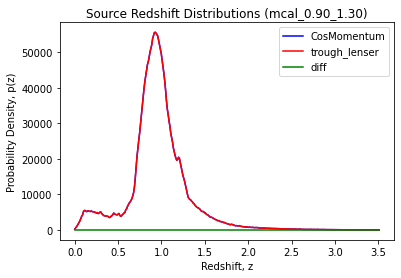

In [8]:
fig, ax = plt.subplots()

ax.plot(new_sources["z"], new_sources["p"], "b-", label="CosMomentum")
ax.plot(old_sources["z"], old_sources["p"], "r-", label="trough_lenser")
ax.plot(old_sources["z"], 1e7*(new_sources["p"] - old_sources["p"]), "g-", label = "diff")

ax.set_xlabel("Redshift, z")
ax.set_ylabel("Probability Density, p(z)")
ax.set_title("Source Redshift Distributions (mcal_0.90_1.30)")

ax.legend()

fig.show()

In [14]:
# new_tracers = pd.read_csv("/Users/adiraju/CosMomentum/Data/redshift_distributions/pofz_Y1_redMaGiC_bin4.dat", 
#                          sep=' ', header=None)
new_tracers = pd.read_csv("/Users/adiraju/CosMomentum/Data/redshift_distributions/lens_galaxy_pofz.dat", 
                         sep=' ', header=None, skiprows=[0])
new_tracers.columns = ["z", "n"]

In [15]:
new_tracers

z  n
0    0.000  0
1    0.005  0
2    0.010  0
3    0.015  0
4    0.020  0
..     ... ..
135  0.675  0
136  0.680  0
137  0.685  0
138  0.690  0
139  0.695  0

[140 rows x 2 columns]

In [16]:
old_tracers = pd.read_csv("/Users/adiraju/flaskwrapper/nofz_redmagic_0.2_0.45_true.dat", 
                         sep=' ', header=None)
old_tracers.columns = ["z", "n"]

In [17]:
old_tracers

z  n
0    0.000  0
1    0.005  0
2    0.010  0
3    0.015  0
4    0.020  0
..     ... ..
135  0.675  0
136  0.680  0
137  0.685  0
138  0.690  0
139  0.695  0

[140 rows x 2 columns]

In [18]:
np.mean(new_tracers["n"].to_numpy())

1750.4071428571428

In [19]:
np.mean(old_tracers["n"].to_numpy())

1750.4071428571428

<ipython-input-20-f44e669f2454>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


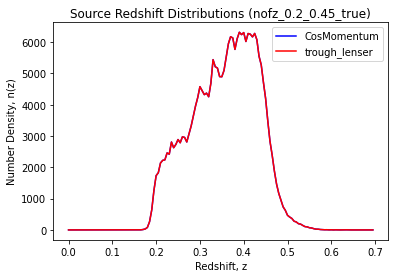

In [20]:
fig, ax = plt.subplots()

ax.plot(new_tracers["z"], new_tracers["n"], "b-", label="CosMomentum")
ax.plot(old_tracers["z"], old_tracers["n"], "r-", label="trough_lenser")

ax.set_xlabel("Redshift, z")
ax.set_ylabel("Number Density, n(z)")
ax.set_title("Source Redshift Distributions (nofz_0.2_0.45_true)")

ax.legend()

fig.show()

In [28]:
old_cls, new_cls = load_cls(0.5)

In [29]:
old_cls

{'gg':            L            CL
 0        0.0  0.000000e+00
 1        1.0  0.000000e+00
 2        2.0  3.028198e-06
 3        3.0  5.105848e-06
 4        4.0  6.668524e-06
 ...      ...           ...
 9995  9995.0  2.562905e-09
 9996  9996.0  2.562420e-09
 9997  9997.0  2.561935e-09
 9998  9998.0  2.561450e-09
 9999  9999.0  2.560965e-09
 
 [10000 rows x 2 columns],
 'gk':            L            CL
 0        0.0  0.000000e+00
 1        1.0  0.000000e+00
 2        2.0  7.226560e-08
 3        3.0  1.212368e-07
 4        4.0  1.575928e-07
 ...      ...           ...
 9995  9995.0  5.491672e-11
 9996  9996.0  5.490625e-11
 9997  9997.0  5.489579e-11
 9998  9998.0  5.488534e-11
 9999  9999.0  5.487488e-11
 
 [10000 rows x 2 columns],
 'kk':            L            CL
 0        0.0  0.000000e+00
 1        1.0  0.000000e+00
 2        2.0  1.934394e-09
 3        3.0  3.212709e-09
 4        4.0  4.138052e-09
 ...      ...           ...
 9995  9995.0  1.356859e-12
 9996  9996.0  1.356605e-12


In [30]:
new_cls

{'gg':            L            CL
 0          0  0.000000e+00
 1          1  0.000000e+00
 2          2  2.855980e-06
 3          3  4.822750e-06
 4          4  6.307920e-06
 ...      ...           ...
 9996    9996  2.594990e-09
 9997    9997  2.594500e-09
 9998    9998  2.594000e-09
 9999    9999  2.593510e-09
 10000  10000  2.593020e-09
 
 [10001 rows x 2 columns],
 'gk':            L            CL
 0          0  0.000000e+00
 1          1  0.000000e+00
 2          2  1.001810e-07
 3          3  1.683780e-07
 4          4  2.192570e-07
 ...      ...           ...
 9996    9996  8.241320e-11
 9997    9997  8.239750e-11
 9998    9998  8.238180e-11
 9999    9999  8.236610e-11
 10000  10000  8.235040e-11
 
 [10001 rows x 2 columns],
 'kk':            L            CL
 0          0  0.000000e+00
 1          1  0.000000e+00
 2          2  3.790700e-09
 3          3  6.315500e-09
 4          4  8.159240e-09
 ...      ...           ...
 9996    9996  3.033080e-12
 9997    9997  3.032520e-12


In [55]:
ratios = new_cls["kk"]["CL"][2:-1].to_numpy()/(old_cls["kk"]["CL"][2:].to_numpy())

In [56]:
ratios

array([1.95963189, 1.9657865 , 1.9717585 , ..., 2.23579136, 2.23579608,
       2.2358007 ])

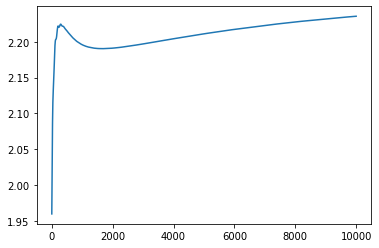

In [59]:
plt.plot(old_cls["kk"]["L"][2:].to_numpy(), ratios)